In [1]:
import numpy as np
import torch

In [2]:
torch.cuda.is_available()

True

In [7]:
test_list = [3,5]
results = np.zeros((len(test_list),10000))
for i,seq in enumerate(test_list):
    results[i,seq] = 1
print(results[:,:10])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [6]:
x = torch.empty(2,2,3)
x

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [8]:
x = torch.rand(2,2)
x

tensor([[0.9716, 0.7362],
        [0.4634, 0.5269]])

In [9]:
x = torch.zeros(2,2)
x

tensor([[0., 0.],
        [0., 0.]])

In [11]:
x = torch.ones(2,2)
print(x.dtype)
x

torch.float32


tensor([[1., 1.],
        [1., 1.]])

In [14]:
x = torch.ones(2,2,dtype=torch.int)
print(x.dtype)
print(x.size())
x


torch.int32
torch.Size([2, 2])


tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

In [15]:
x = torch.tensor([2.5,0.1])
x

tensor([2.5000, 0.1000])

In [19]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
# z = torch.add(x,y) # same thing
print(z)

tensor([[0.4423, 0.8018],
        [0.4140, 0.6367]])
tensor([[0.1202, 0.7941],
        [0.3590, 0.2611]])
tensor([[0.5625, 1.5959],
        [0.7731, 0.8978]])


In [20]:
y.add_(x)
print(y)

tensor([[0.5625, 1.5959],
        [0.7731, 0.8978]])


In [23]:
# basic operations
x = torch.rand(5,3)
print(x)
print(x[1,1])
print(x[1,1].item())

tensor([[0.2860, 0.6924, 0.8349],
        [0.0022, 0.5082, 0.4735],
        [0.6729, 0.2206, 0.5432],
        [0.4328, 0.4804, 0.6429],
        [0.6591, 0.4975, 0.2792]])
tensor(0.5082)
0.5081883668899536


In [27]:
x = torch.rand(4,4)
print(x)
y = x.view(16)
z = x.view(2,8) # -1,8 also works
print(y)
print(z)

tensor([[0.2372, 0.5054, 0.5252, 0.7590],
        [0.8056, 0.5363, 0.7044, 0.8650],
        [0.6220, 0.4578, 0.1259, 0.5947],
        [0.8848, 0.0391, 0.6409, 0.6885]])
tensor([0.2372, 0.5054, 0.5252, 0.7590, 0.8056, 0.5363, 0.7044, 0.8650, 0.6220,
        0.4578, 0.1259, 0.5947, 0.8848, 0.0391, 0.6409, 0.6885])
tensor([[0.2372, 0.5054, 0.5252, 0.7590, 0.8056, 0.5363, 0.7044, 0.8650],
        [0.6220, 0.4578, 0.1259, 0.5947, 0.8848, 0.0391, 0.6409, 0.6885]])


In [30]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [33]:
# if we use cpu, a and b will share the same memory location, 
# but when using gpu, they are in different locations. 
print(a + 1) 
print(b)

tensor([2., 2., 2., 2., 2.])
[1. 1. 1. 1. 1.]


In [34]:
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [36]:
b.numpy()

array([1., 1., 1., 1., 1.])

In [37]:
x = torch.ones(5, requires_grad=True) # calculate the gradients
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [15]:
# f = w * x

# f = 2 * x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)

def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y,y_pred)

    # gradients
    dw = gradient(X,Y,y_pred)

    #update weights
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [18]:
import torch
# f = w * x

# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y,y_pred)

    # gradients = backward pass
    l.backward() # dl/dw
    with torch.no_grad():
        #update weights
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [30]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass: gradients
# - update our weights
import torch
import torch.nn as nn

import torch
# f = w * x

# f = 2 * x

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor([5],dtype=torch.float32)

# model prediction
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features



class LinearModel(nn.Module):

    def __init__(self,input_dim,output_dim):
        super(LinearModel,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        return self.lin(x)

model = nn.Linear(input_size, output_size) 

model = LinearModel(input_size, output_size) # same thing

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# loss = MSE
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


# Training
learning_rate = 0.1
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)

    # loss
    l = loss(Y,y_pred)

    # gradients = backward pass
    l.backward() # dl/dw
    #update weights
    optimizer.step()
     
    # zero gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {model(X_test).item():.3f}') 

4 1
Prediction before training: f(5) = 2.701
epoch 1: w = 2.530, loss = 14.60078430
epoch 11: w = 1.791, loss = 0.08225676
epoch 21: w = 1.834, loss = 0.04216808
epoch 31: w = 1.878, loss = 0.02295874
epoch 41: w = 1.910, loss = 0.01250054
epoch 51: w = 1.933, loss = 0.00680627
epoch 61: w = 1.951, loss = 0.00370587
epoch 71: w = 1.964, loss = 0.00201776
epoch 81: w = 1.973, loss = 0.00109863
epoch 91: w = 1.980, loss = 0.00059817
Prediction after training: f(5) = 9.969


In [20]:
torch.tensor([1,2,3,4]).unsqueeze(1)

tensor([[1],
        [2],
        [3],
        [4]])

In [21]:
torch.tensor([1,2,3,4]).view(-1,1)

tensor([[1],
        [2],
        [3],
        [4]])

![alt text](./images/image.png)

![alt text](./images/image-1.png)

In [ ]:
# 1) Design model input, output size, forward pas
# 2) Construct loss optimizer
# 3) Training loop
#     - forward pass: compute prediction and loss
#     - backward pass: gradients
#     - update weights

epoch: 10, loss = 4429.8740
epoch: 20, loss = 3305.2041
epoch: 30, loss = 2491.1091
epoch: 40, loss = 1901.2137
epoch: 50, loss = 1473.3636
epoch: 60, loss = 1162.7690
epoch: 70, loss = 937.1111
epoch: 80, loss = 773.0391
epoch: 90, loss = 653.6625
epoch: 100, loss = 566.7505


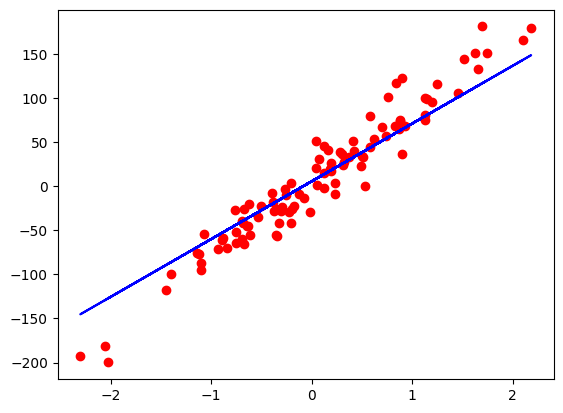

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted,y)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()


In [9]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# prepare data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

    

569 30
epoch: 10, loss = 0.6471
epoch: 20, loss = 0.5222
epoch: 30, loss = 0.4449
epoch: 40, loss = 0.3924
epoch: 50, loss = 0.3542
epoch: 60, loss = 0.3248
epoch: 70, loss = 0.3014
epoch: 80, loss = 0.2823
epoch: 90, loss = 0.2662
epoch: 100, loss = 0.2525
accuracy = 0.9211


![alt text](./images/image-2.png)

![alt text](./images/image-3.png)

![alt text](./images/image-4.png)
![alt text](./images/image-5.png)

In [39]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt('./data/wine.csv',delimiter=",", dtype=np.float32,skiprows=1)
        # self.x = torch.from_numpy(xy[:,1:])
        # self.y = torch.from_numpy(xy[:,[0]]) # [0] will lead to a nsamples x 1 array
        self.x = xy[:,1:]
        self.y = xy[:, [0]]
        self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self,index):
        # dataset[0]
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
    
    def __len__(self):
        # len(dataset) 
        return self.n_samples

class ToTensor:
    def __call__(self,sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target

In [19]:
dataset = WineDataset()
first_data = dataset[0]
features,labels = first_data
print(features, labels)
print(f"Dataset size: {len(dataset)}")

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
Dataset size: 178


In [32]:
# torch.tensor([1,2,3,4],dtype=torch.float32).view(-1,1)
torch.tensor([1,2,3,4],dtype=torch.float32).unsqueeze(1).shape

torch.Size([4, 1])

In [28]:
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)
# num_workers=0：数据加载在主进程中顺序执行（单线程）。这是默认设置。
# num_workers>0：数据加载会使用多线程并行加载，num_workers 表示线程数量。

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / 4)
print(total_samples,n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward, update
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [31]:
torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
# fashion-mnist,, cifar, coco


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [42]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))


tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [43]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


![alt text](./images/image-6.png)
![alt text](./images/image-7.png)
![alt text](./images/image-8.png)

![alt text](./images/image-9.png)

In [49]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.from_numpy(x)
outputs = torch.softmax(x,dim=0)
print('softmax torch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986], dtype=torch.float64)


 ![alt text](./images/image-10.png)
 ![alt text](./images/image-11.png)
 ![alt text](./images/image-12.png)
 ![alt text](./images/image-13.png)

![alt text](./images/image-14.png)
![alt text](./images/image-15.png)
![alt text](./images/image-16.png)

![alt text](./images/image-18.png)

In [50]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

Y = np.array([1,0,0])
Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Y_pred_good_sm = softmax(Y_pred_good)
Y_pred_bad_sm = softmax(Y_pred_bad)
l1 = cross_entropy(Y, Y_pred_good_sm)
l2 = cross_entropy(Y, Y_pred_bad_sm)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
Loss1 numpy: 0.7679
Loss2 numpy: 1.3533


In [54]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])
# nsamples x nclasses = 1 x 3
Y_pred_good = torch.tensor([[0.7,0.2,0.1]])
Y_pred_bad = torch.tensor([[0.1,0.3,0.6]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad,Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

0.7679495811462402
1.3532865047454834
tensor([0])
tensor([2])


![alt text](./images/image-19.png)
![alt text](./images/image-20.png)
![alt text](./images/image-22.png)

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forwad(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # nn.Sigmoid
        # nn.Softmax

        self.linear2 = nn.Linear(hidden_size)
    
    def forwad(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size,1)

    def forward(self,x):
        # F.leaky_relu()
        # F.tanh()
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))




In [ ]:
model = NeuralNet2(input_size=28*28,hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() #(applies Softmax)
 

In [ ]:
model = NeuralNet1(input_size=28*28,hidden_size=5)
criterion = nn.BCELoss()

![alt text](./images/image-21.png)

![alt text](./images/image-23.png)
![alt text](./images/image-24.png)
![alt text](./images/image-25.png)
![alt text](./images/image-26.png)
![alt text](./images/image-27.png)
![alt text](./images/image-28.png)
![alt text](./images/image-29.png)
![alt text](./images/image-30.png)
![alt text](./images/image-31.png)
![alt text](./images/image-32.png)
![alt text](./images/image-33.png)

`nn.SiLU()`（也称为**Swish**）是一种激活函数，它是一个平滑的非线性激活函数，定义为：

\[
\text{Swish}(x) = x \cdot \sigma(x)
\]

其中，\(\sigma(x)\) 是Sigmoid函数，即：

\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

所以，Swish函数是输入 \(x\) 和Sigmoid函数的输出 \(\sigma(x)\) 的乘积。Swish的一个特点是它是一个**连续的可微函数**，并且没有像ReLU那样存在死区问题（即当输入为负时输出恒为零）。

### Swish与ReLU的区别：

1. **数学表达式**：
   - **ReLU**：\( \text{ReLU}(x) = \max(0, x) \)
   - **Swish**：\( \text{Swish}(x) = x \cdot \sigma(x) \)

2. **性质**：
   - **ReLU** 在 \(x < 0\) 时输出为零，在 \(x > 0\) 时输出为 \(x\)。这可能导致神经元“死亡”问题——即输入为负时，ReLU的输出始终为零，可能导致梯度为零，进而无法学习。
   - **Swish** 在整个输入范围内都具有平滑的梯度，不会出现ReLU那种死区问题。其输出在负输入时也是非零的，因为即使 \(x\) 为负，\(\sigma(x)\) 的值仍然是一个正数，从而使得 Swish 不会完全为零。

3. **性能**：
   - 在某些任务中，Swish 激活函数已经被证明能够提供比 ReLU 更好的性能，尤其是在深度神经网络中。它的平滑性帮助了模型在训练中收敛得更好。
   - 然而，Swish 比 ReLU 计算更复杂，因为它需要计算Sigmoid函数，而 ReLU只需要一个比较操作。

### 总结：

- **ReLU** 是简单且高效的激活函数，广泛应用于各种神经网络架构，但它可能会导致“神经元死亡”问题。
- **Swish** 是一个更平滑的激活函数，通常在更深的网络或特定任务中表现更好，因为它避免了ReLU的死区问题。

你可以通过实验选择适合你任务的激活函数，通常情况下，ReLU适用于大多数场景，而Swish可以在一些更复杂的网络中提供更好的效果。

我无法直接画图，但我可以给你描述它们的轨迹，并解释它们之间的区别，以及什么时候使用 `SiLU`（Swish）激活函数。

### **SiLU（Swish）的轨迹**：
- **SiLU (Swish)** 的函数形式是：\( \text{SiLU}(x) = x \cdot \sigma(x) = \frac{x}{1 + e^{-x}} \)
- 当输入 \(x\) 为负时，`SiLU(x)` 仍然是负的，但不为零，而是一个小的负值。
- 当输入 \(x\) 为零时，`SiLU(0)` 的输出为零。
- 当输入 \(x\) 为正时，`SiLU(x)` 的输出会跟随 \(x\) 的增大而增大，但会比 ReLU 更加平滑，并不会像 ReLU 那样“陡峭”地跳跃。

**形状描述**：  
- **负区间**：随着 \(x\) 变负，`SiLU(x)` 逐渐增大但永远不会为零。相对于ReLU，`SiLU(x)` 在负数时也有较为平滑的变化。
- **正区间**：在 \(x\) 为正时，`SiLU(x)` 的输出接近于 \(x\)，但与 ReLU 不同，`SiLU(x)` 在正值时不会立即变为线性，它的增速逐渐加快，表现出更平滑的过渡。

### **Leaky ReLU vs SiLU**

**Leaky ReLU** 的函数形式是：

\[
\text{LeakyReLU}(x) = \begin{cases}
x, & x \geq 0 \\
\alpha x, & x < 0
\end{cases}
\]

其中，\(\alpha\) 是一个非常小的常数（比如 0.01）。在 \(x < 0\) 时，Leaky ReLU 不会像 ReLU 那样输出零，而是输出一个较小的负值。

### **Leaky ReLU 和 SiLU 的区别**：

1. **负区间的处理**：
   - **Leaky ReLU**：当输入 \(x\) 为负时，输出为 \( \alpha \cdot x \)，是一个较小的负数，通常是线性的。
   - **SiLU (Swish)**：当输入为负时，输出仍然是负值，但不是简单的线性负数，而是通过Sigmoid函数调整过的，因此输出不会像Leaky ReLU那样是线性的负数，具有更平滑的过渡。

2. **正区间的处理**：
   - **Leaky ReLU**：当输入为正时，输出直接等于 \(x\)，是线性的。
   - **SiLU (Swish)**：当输入为正时，输出也是正值，但由于包含了 Sigmoid 函数，输出变化更加平滑，增速比Leaky ReLU慢。

3. **平滑性**：
   - **Leaky ReLU** 由于其线性特性，梯度在负值区间是恒定的，可能会在某些情况下导致不稳定的学习。
   - **SiLU (Swish)** 是一个平滑的非线性函数，能够避免Leaky ReLU那种突然的变化，可能在深度神经网络中表现得更好。

### **什么时候使用 SiLU (Swish)**？

1. **深度神经网络（DNN）和较深的网络**：  
   在一些深度网络（特别是深度学习中一些更复杂的模型）中，Swish函数通常能比ReLU和Leaky ReLU表现得更好，特别是在避免梯度消失和神经元死亡问题上。
   
2. **当你希望平滑的梯度**：  
   SiLU 在训练过程中提供更平滑的梯度，这对于一些需要精细梯度调整的任务（例如生成对抗网络、强化学习等）会很有帮助。

3. **大规模任务和复杂任务**：  
   如果你正在处理一个有多个层次的神经网络任务，Swish 可能会比传统的 ReLU 或 Leaky ReLU 更有优势，特别是当模型变得非常深时，Swish 的平滑性能有效提升训练的稳定性和收敛速度。

4. **非线性增强**：  
   对于某些任务，SiLU的非线性效果能够帮助网络更好地建模复杂的关系，尤其是在任务涉及到大量非线性特征时，Swish可能提供更好的表示能力。

### **总结**：
- **SiLU (Swish)** 是一个平滑且非线性的激活函数，能够避免 ReLU 中的“神经元死亡”问题。
- **Leaky ReLU** 是一个在负数区间有小斜率的激活函数，避免了标准 ReLU 的死区问题，但相比于 Swish，Leaky ReLU 缺乏那么平滑的特性。
- 使用 `SiLU`（Swish）主要是为了获得更平滑、更稳定的训练，尤其适用于深度学习模型、复杂任务以及大规模神经网络。